# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])  # (height, width)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(np.concatenate((y_train, y_valid, y_test))).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Label of figure: Speed limit (30km/h)


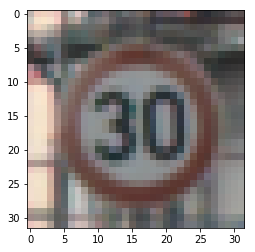

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Randomly plot a figure and its label
# You can check the label(number) in the csv file given
import random
fig_id = random.randint(0,n_train-1)
plt.imshow(X_train[fig_id])

# Get label of figure
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
fig_label = name_values[y_train[fig_id]][1].decode('ascii')  # The second element in the line is the label
print ("Label of figure:", fig_label)

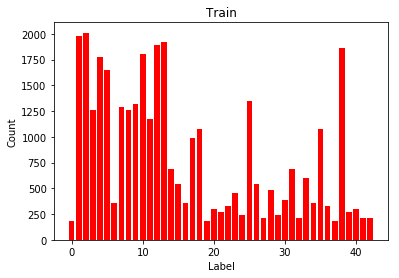

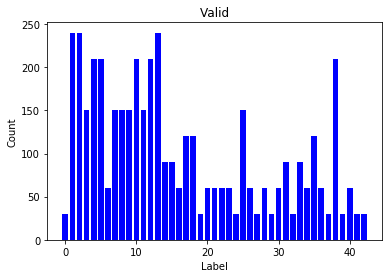

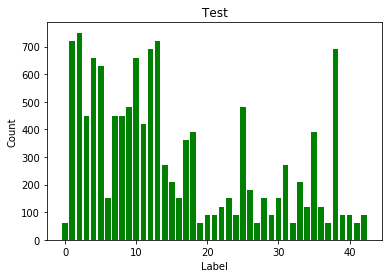

In [4]:
# Visualize the distribution of traffic sign in train, valid and test
# We'll see that the distribution of data is similar, which is vital to the success of training
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Plot distribution
plt.bar(unique_train, counts_train, color='r')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Train')
plt.show()
plt.bar(unique_valid, counts_valid, color='b')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Valid')
plt.show()
plt.bar(unique_test, counts_test, color='g')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Test')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)
Label of figure: Speed limit (30km/h)


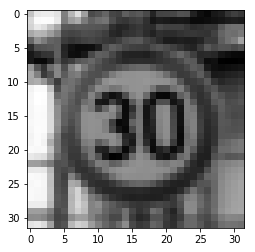

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# We first convert it to gray scale.
# Normalization is done after the data augmentation
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# Print out the dimension of data. The last dimension should be 1.
print (X_train_gray.shape)
print (X_valid_gray.shape)
print (X_test_gray.shape)

# Plot the gray figure
plt.imshow(X_train_gray[fig_id].squeeze(), cmap='gray')
print ("Label of figure:", fig_label)

In [6]:
# The following three types of data augmentation are useful according to:
#    https://github.com/Goddard/udacity-traffic-sign-classifier
# However, the train and valid figures are merged in my implementation first, which is different from the original implementation.

# Merge the train & valid data
X_train_new = np.concatenate((X_train_gray, X_valid_gray), axis=0)
y_train_new = np.concatenate((y_train, y_valid), axis=0)
unique_train_new, counts_train_new = np.unique(y_train_new, return_counts=True)
num_sample = X_train_new.shape[0]
print (X_train_new.shape)
print (y_train_new.shape)

# Data augmentation
import cv2
more_X_train_new = []
more_y_train_new = []
for i in range(num_sample):
    # Add original image to the list
    more_X_train_new.append(X_train_new[i])
    more_y_train_new.append(y_train_new[i])
    
    # We only duplicate the images the count of its label is less than 3000.
    # This makes data set more equally distributed.
    if(counts_train_new[y_train_new[i]] < 3000):
        for j in range(5):
            random_higher_bound = random.randint(27, 32)
            random_lower_bound = random.randint(0, 5)
            points_one = np.float32([[0,0],[32,0],[0,32],[32,32]])
            points_two = np.float32([[0, 0], [random_higher_bound, random_lower_bound], [random_lower_bound, 32],[32, random_higher_bound]])
            M = cv2.getPerspectiveTransform(points_one, points_two)
            dst = cv2.warpPerspective(X_train_new[i], M, (32,32))
            dst = np.reshape(dst, (32,32,1))
            more_X_train_new.append(dst)
            more_y_train_new.append(y_train_new[i])
            
            tilt = random.randint(-12, 12)
            M = cv2.getRotationMatrix2D((X_train_new[i].shape[0]/2, X_train_new[i].shape[1]/2), tilt, 1)
            dst = cv2.warpAffine(X_train_new[i], M, (X_train_new[i].shape[0], X_train_new[i].shape[1]))
            dst = np.reshape(dst, (32,32,1))
            more_X_train_new.append(dst)
            more_y_train_new.append(y_train_new[i])
            
            # Two more figures added to that class
            counts_train_new[y_train_new[i]] += 2
            
more_X_train_new = np.array(more_X_train_new)
more_y_train_new = np.array(more_y_train_new)
print (more_X_train_new.shape)
print (more_y_train_new.shape)

(39209, 32, 32, 1)
(39209,)
(125439, 32, 32, 1)
(125439,)


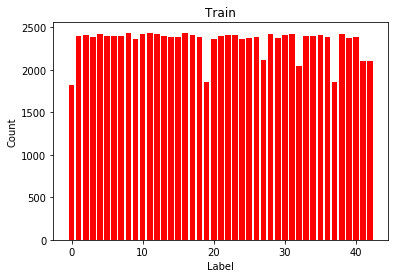

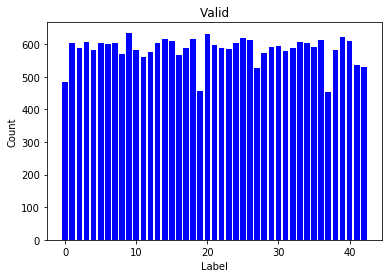

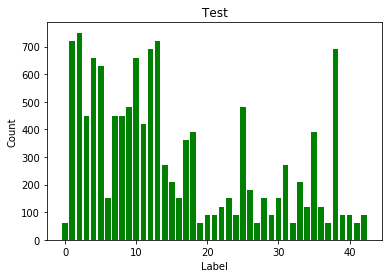

In [7]:
# Split the train & valid data set and plot the distribution
# We should see a more balanced distribution among different classes
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(more_X_train_new, more_y_train_new, test_size=0.2)

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Plot distribution
plt.bar(unique_train, counts_train, color='r')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Train')
plt.show()
plt.bar(unique_valid, counts_valid, color='b')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Valid')
plt.show()
plt.bar(unique_test, counts_test, color='g')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Test')
plt.show()

In [8]:
# Normalize the dataset
X_train = (X_train-128.0)/128.0
X_valid = (X_valid-128.0)/128.0
X_test = (X_test_gray-128.0)/128.0
print (np.max(X_train), np.min(X_train))
print (np.max(X_valid), np.min(X_valid))
print (np.max(X_test), np.min(X_test))

0.9921875 -1.0
0.9921875 -1.0
0.9921875 -0.96875


### Model Architecture

In [9]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 50
BATCH_SIZE = 128
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1)
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer2 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2)
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer3
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 412), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(412))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding='VALID') + conv3_b
    conv3   = tf.nn.relu(conv3)
    
    # Flatten the output for a fully connected layer
    fc0 = flatten(conv3)
    
    # Layer4
    fc1_W = tf.Variable(tf.truncated_normal(shape=(412, 122), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(122))
    fc1   = tf.nn.relu(tf.nn.bias_add(tf.matmul(fc0, fc1_W), fc1_b))
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    # Layer5
    fc2_W = tf.Variable(tf.truncated_normal(shape=(122, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.nn.relu(tf.nn.bias_add(tf.matmul(fc1, fc2_W), fc2_b))
    fc2   = tf.nn.dropout(fc2, keep_prob)
    
    # Layer6
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline
rate = 0.0001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
# Train the model
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print ("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.296
Validation Accuracy = 0.295

EPOCH 2 ...
Train Accuracy = 0.549
Validation Accuracy = 0.550

EPOCH 3 ...
Train Accuracy = 0.685
Validation Accuracy = 0.682

EPOCH 4 ...
Train Accuracy = 0.746
Validation Accuracy = 0.746

EPOCH 5 ...
Train Accuracy = 0.787
Validation Accuracy = 0.787

EPOCH 6 ...
Train Accuracy = 0.817
Validation Accuracy = 0.815

EPOCH 7 ...
Train Accuracy = 0.847
Validation Accuracy = 0.844

EPOCH 8 ...
Train Accuracy = 0.872
Validation Accuracy = 0.869

EPOCH 9 ...
Train Accuracy = 0.889
Validation Accuracy = 0.886

EPOCH 10 ...
Train Accuracy = 0.902
Validation Accuracy = 0.898

EPOCH 11 ...
Train Accuracy = 0.909
Validation Accuracy = 0.905

EPOCH 12 ...
Train Accuracy = 0.919
Validation Accuracy = 0.914

EPOCH 13 ...
Train Accuracy = 0.926
Validation Accuracy = 0.921

EPOCH 14 ...
Train Accuracy = 0.934
Validation Accuracy = 0.929

EPOCH 15 ...
Train Accuracy = 0.938
Validation Accuracy = 0.933

EPOCH 16 ...
Train Ac

In [13]:
# Performance on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.916


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

label = Bumpy road


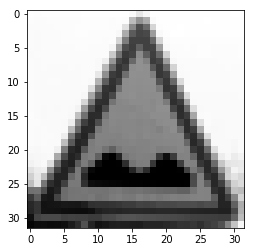

label = No vehicles


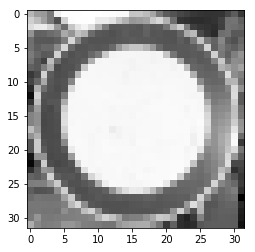

label = Go straight or left


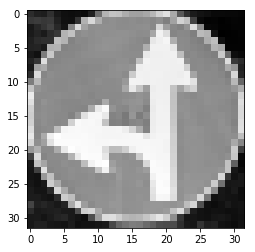

label = Speed limit (30km/h)


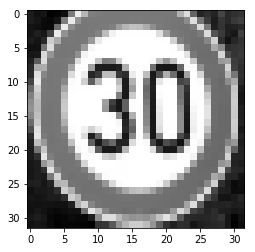

label = Ahead only


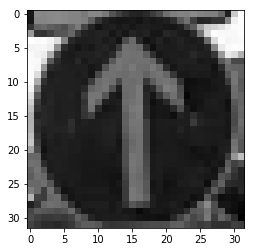

(5, 32, 32, 1)


In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
images = sorted(glob.glob('./my_traffic_sign/*.png'))
labels = np.array([22,15,37,1,35])

# Plot the gray sacle image and its label
gray_images = []
for image, label in zip(images,labels):
    img = cv2.imread(image)
    img_gray = np.sum(img/3.0, axis=2, keepdims=True)
    gray_images.append(img_gray)
    print ("label =", name_values[label][1].decode('ascii'))
    plt.imshow(img_gray.squeeze(), cmap='gray')
    plt.show()

# Preprocess gray_images so that it can be fed into tensorflow
gray_images = np.array(gray_images)
print (gray_images.shape)

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(logits, feed_dict={x: gray_images, keep_prob: 1})
    prediction = np.argmax(prediction, axis=1)
    # Print out the actual label and the predicted label.
    # You should see a 100% accuracy here.
    for pred, label in zip(prediction, labels):
        print ("The actual label is '{}', The predicted label is '{}'".format(
            name_values[label][1].decode('ascii'), name_values[pred][1].decode('ascii')
        ))

INFO:tensorflow:Restoring parameters from ./lenet
The actual label is 'Bumpy road', The predicted label is 'Bumpy road'
The actual label is 'No vehicles', The predicted label is 'Priority road'
The actual label is 'Go straight or left', The predicted label is 'Go straight or left'
The actual label is 'Speed limit (30km/h)', The predicted label is 'Speed limit (30km/h)'
The actual label is 'Ahead only', The predicted label is 'Ahead only'


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# Simply redo an accuracy operation
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(gray_images, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
prob = tf.nn.softmax(logits)
top_k_prob = tf.nn.top_k(prob, k=5)
# Run the session
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(top_k_prob, feed_dict={x: gray_images, keep_prob: 1})
    for i in range(5):
        # We're quite certain in the prediction, which is great!
        print ("Certainty of Image{} = {}".format(i, prediction.values[i]))


INFO:tensorflow:Restoring parameters from ./lenet
Certainty of Image0 = [ 1.  0.  0.  0.  0.]
Certainty of Image1 = [ 1.  0.  0.  0.  0.]
Certainty of Image2 = [ 1.  0.  0.  0.  0.]
Certainty of Image3 = [ 1.  0.  0.  0.  0.]
Certainty of Image4 = [ 1.  0.  0.  0.  0.]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.